1. ANALISIS EXPLORATORIO

Importamos las librerias necesarias

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Cargamos los csv del dataset vehicle

In [32]:

car_data = pd.read_csv(r'C:\Users\fjavi\AnalisisDatos\car data.csv')
car_dekho = pd.read_csv(r'C:\Users\fjavi\AnalisisDatos\CAR DETAILS FROM CAR DEKHO.csv')
car_details_v3 = pd.read_csv(r'C:\Users\fjavi\AnalisisDatos\Car details v3.csv')
car_details_v4 = pd.read_csv(r'C:\Users\fjavi\AnalisisDatos\car details v4.csv')


Analisis de Dataset vehicle: car data.csv

In [33]:

print("\nInfo car data.csv")
print(car_data.head())
print(car_data.info())
print(car_data.describe())



Info car data.csv
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Pre

Analisis de Dataset vehicle: CAR DETAILS FROM CAR DEKHO.csv

In [34]:
print("\nInfo CAR DETAILS FROM CAR DEKHO.csv")
print(car_dekho.head())
print(car_dekho.info())
print(car_dekho.describe())


Info CAR DETAILS FROM CAR DEKHO.csv
                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 


Analisis de Dataset vehicle: Car details v3.csv

In [35]:
print("\nInfo Car details v3.csv")
print(car_details_v3.head())
print(car_details_v3.info())
print(car_details_v3.describe())


Info Car details v3.csv
                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000

Analisis de Dataset vehicle: Car details v4.csv

In [36]:
print("\nInfo Car details v4.csv")
print(car_details_v4.head())
print(car_details_v4.info())
print(car_details_v4.describe())


Info Car details v4.csv
            Make                            Model    Price  Year  Kilometer  \
0          Honda              Amaze 1.2 VX i-VTEC   505000  2017      87150   
1  Maruti Suzuki                  Swift DZire VDI   450000  2014      75000   
2        Hyundai             i10 Magna 1.2 Kappa2   220000  2011      67000   
3         Toyota                         Glanza G   799000  2019      37500   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000  2018      69000   

  Fuel Type Transmission   Location   Color   Owner Seller Type   Engine  \
0    Petrol       Manual       Pune    Grey   First   Corporate  1198 cc   
1    Diesel       Manual   Ludhiana   White  Second  Individual  1248 cc   
2    Petrol       Manual    Lucknow  Maroon   First  Individual  1197 cc   
3    Petrol       Manual  Mangalore     Red   First  Individual  1197 cc   
4    Diesel       Manual     Mumbai    Grey   First  Individual  2393 cc   

            Max Power              Max Torq

2. REPROCESAMOS LOS DATOS

In [ ]:
def preprocess_data(data):
 
    data = data.drop_duplicates()  # Eliminar duplicados
    data = data.dropna()  # Eliminar valores faltantes
    return data

car_data_clean = preprocess_data(car_data)
car_dekho_clean = preprocess_data(car_dekho)
car_details_v3_clean = preprocess_data(car_details_v3)
car_details_v4_clean = preprocess_data(car_details_v4)


Transformamos los datos para categorizarlos

In [38]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

def encode_and_scale(data):
   
    # Codificar variables categóricas
    categorical_columns = data.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        data[col] = LabelEncoder().fit_transform(data[col])

    # Escalar variables numéricas
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    data[numeric_columns] = StandardScaler().fit_transform(data[numeric_columns])
    
    return data

car_data_transformed = encode_and_scale(car_data_clean)
car_dekho_transformed = encode_and_scale(car_dekho_clean)
car_details_v3_transformed = encode_and_scale(car_details_v3_clean)
car_details_v4_transformed = encode_and_scale(car_details_v4_clean)


3. SELECCIONAMOS LAS CARACTERÍSTICAS MÁS RELEVANTES PARA ENTRENAR EL MODELO UTILIZANDO SELECCIÓN DE CARACTERÍSTICAS.


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

def select_features(data, target_variable):
    
    X = data.drop(columns=[target_variable])
    y = data[target_variable]

    # Aplicar RFE para seleccionar las características
    model = LinearRegression()
    selector = RFE(model, n_features_to_select=8) #Seleccionamos la cantidad ded columnas para categorizarlas (8)
    selector.fit(X, y)
    
    # Seleccionar las columnas relevantes
    selected_columns = X.columns[selector.support_]
    print(f"Características seleccionadas: {list(selected_columns)}")
    
    return data[selected_columns], y

# Usar la función en los datasets
X_car_data, y_car_data = select_features(car_data_transformed, target_variable='Selling_Price')


Características seleccionadas: ['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']


4. DIVIDIMOS EL DATASET EN TRAIN Y TEST (Divide los datos en conjuntos de entrenamiento y prueba (80%-20%).)


In [48]:
from sklearn.model_selection import train_test_split

def split_data(X, y):
  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

X_train_car_data, X_test_car_data, y_train_car_data, y_test_car_data = split_data(X_car_data, y_car_data)


5. ENTRENAMOS EL MODELO CONFIGURANDO HIPERPARÁMETROS

In [49]:
def train_model(X_train, y_train):
    
#Entrena un modelo de regresión lineal.
  
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Entrenar el modelo con el conjunto de entrenamiento
model_car_data = train_model(X_train_car_data, y_train_car_data)



6. EVALUAMOS EL DESEMPEÑO DEL MODELO


In [50]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(model, X_test, y_test):
#Evaluamos el modelo utilizando el RMSE y el R^2.
    
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    print(f"RMSE: {rmse}")
    print(f"R^2 Score: {r2}")

# Evaluar el modelo en el conjunto de prueba
evaluate_model(model_car_data, X_test_car_data, y_test_car_data)


RMSE: 0.5249602006853701
R^2 Score: 0.7352559076589604


c:\Users\fjavi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


7. GRAFICAMOS LA LINEA DE REGRESION LINEAL

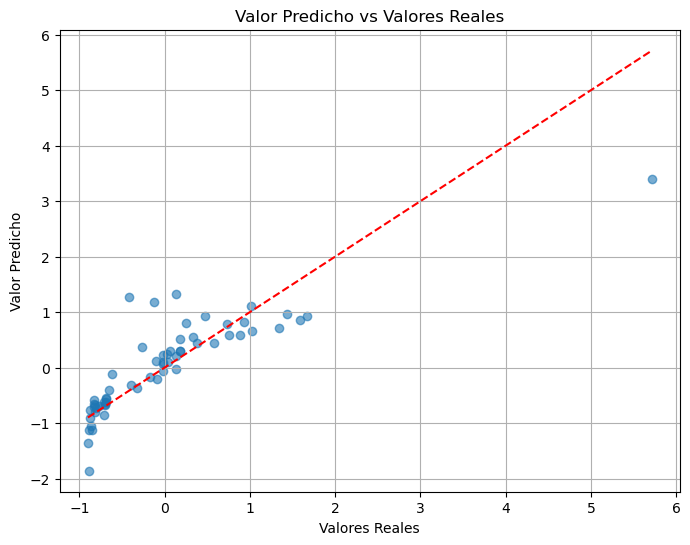

In [56]:
import matplotlib.pyplot as plt

def plot_results(y_test, predictions, title="Valor Predicho vs Valores Reales"):
   
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions, alpha=0.6)
    plt.xlabel("Valores Reales")
    plt.ylabel("Valor Predicho")
    plt.title(title)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
    plt.grid()
    plt.show()


# Genera el grafico para los datos solicitados
predictions = model_car_data.predict(X_test_car_data)
plot_results(y_test_car_data, predictions)


Observamos los coeficientes del modelo de regresion lineal

In [46]:
def mostrar_coeficientes(model, feature_names):
   
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': model.coef_
    })
    print("Coeficientes del modelo:")
    print(coef_df)

# Llamar a la función para mostrar los coeficientes del modelo con el conjunto de datos de 'car data'
mostrar_coeficientes(model_car_data, X_train_car_data.columns)


Coeficientes del modelo:
         Feature  Coefficient
0       Car_Name     0.001077
1           Year     0.200298
2  Present_Price     0.757456
3     Kms_Driven    -0.073053
4      Fuel_Type    -0.239369
5    Seller_Type    -0.214048
6   Transmission    -0.317807
7          Owner     0.038306
